**Pytorch Neural Network Implemetation using torch.nn module**

In this notebook I am going to build a neural netwprk model using pytorch torch.nn module.It is quite simple to develop this. One just has to know the basics of the nn model and not much computation is required for pytorch implementation as torch.nn module has everything that a nn model needs satrting from forward to backeard propagation.

In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

column_2C_weka.csv
column_3C_weka.csv



We will be using Biomechanical Orthopedic Patients data set to classifiy using our neural network model.This data set has 310 training examples with 6 features and one target attribute which is 'class'.

In [129]:
train_df = pd.read_csv('../input/column_2C_weka.csv')
train_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Here we import torch and Variable class from torch.autograd which simplifies our job of finding the gardients of loss function during backpropagation. To use torch.nn module we need train_x ant target to be Variable objects not simply torch.Tensors. 

In [130]:
import torch
from torch.autograd import Variable
dtype = torch.FloatTensor

This part shows some data preprocessing steps that include mapping the strings to int and forming the training data train_x as Variavle form numpy ndarray.

In [62]:
dict1 = {'Normal':0 , 'Abnormal':1}
train_df['class'] = train_df['class'].map(dict1)
target = train_df['class'].values
del train_df['class']
train_x = train_df.as_matrix()
train_x = Variable(torch.from_numpy(train_x).type(dtype))
target = Variable(torch.from_numpy(target).type(dtype))

This is the initialisation part. Here we define the size of our nn model ,which is one hidden layer of size 10 in this example. Then we define the nn model by craeting a object nn_model using torch.nn.Sequential where sequentially we add layers to the model. In our model first we have an input layer of size 6 ,then a linear function applied on the input layer having parameter dimension (n_input,n_hidden) . Then a ReLU applied to that hidden layer and a linear function again produces the fianl layer and a sigmoid is finally applies on that fianl layer to produce the y_pred or the output probabilities.

In [131]:
m = train_df.shape[1]
n_input = m
n_hidden = 10
n_output = 1
nn_model = torch.nn.Sequential(
    torch.nn.Linear(n_input,n_hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(n_hidden,n_output),
    torch.nn.Sigmoid())
loss_fn = torch.nn.BCELoss() ## creating an object of Binary Cross entropy loss 
alpha = .002 ## learning rate
n_iter = 1000 ## no of iterations

Here is our actaul algorithm implementation. We first compute the y_pred using our existing params.Then find loss.Then using loss.backward get the gradients . Then finally upadate the parameters in nn_model which is contained in nn_model.parameters(). 

In [125]:
cost = []
iter1 = []
y_pred 
for t in range(n_iter):
    ## forward propagation to compute the predicted output y_pred form input data train_x
    y_pred = nn_model(train_x)
    
    ## computing the cost
    loss = loss_fn(y_pred,target)
    print('iter'+str(t)+' loss = '+str(loss.data[0]))
    cost.append(loss.data[0])
    iter1.append(t)
    
    ## inialize the grads to zero before computing them
    nn_model.zero_grad()
    
    ## computes the gradients and stores them to param.grad
    loss.backward()
    
    ## updating the params
    for param in nn_model.parameters():
        param.data =  param.data - alpha * param.grad.data

/opt/conda/lib/python3.6/site-packages/torch/nn/functional.py:767: UserWarning: Using a target size (torch.Size([310])) that is different to the input size (torch.Size([310, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


iter0 loss = 2.4455535411834717
iter1 loss = 4.180837631225586
iter2 loss = 1.5746468305587769
iter3 loss = 1.538549780845642
iter4 loss = 3.4395575523376465
iter5 loss = 1.0011605024337769
iter6 loss = 1.1787807941436768
iter7 loss = 1.8896273374557495
iter8 loss = 0.5670288801193237
iter9 loss = 0.6432705521583557
iter10 loss = 0.7850519418716431
iter11 loss = 0.9378297924995422
iter12 loss = 0.9240021705627441
iter13 loss = 1.002001166343689
iter14 loss = 0.8752433657646179
iter15 loss = 0.8622692227363586
iter16 loss = 0.8420873880386353
iter17 loss = 0.7924823760986328
iter18 loss = 0.8018447160720825
iter19 loss = 0.7422419190406799
iter20 loss = 0.7664347290992737
iter21 loss = 0.7093923687934875
iter22 loss = 0.739213228225708
iter23 loss = 0.6879369616508484
iter24 loss = 0.7199928164482117
iter25 loss = 0.6743884086608887
iter26 loss = 0.707064688205719
iter27 loss = 0.6657314896583557
iter28 loss = 0.6982100605964661
iter29 loss = 0.6598170399665833
iter30 loss = 0.691625654

iter313 loss = 0.37643569707870483
iter314 loss = 0.3765300512313843
iter315 loss = 0.37556931376457214
iter316 loss = 0.37558335065841675
iter317 loss = 0.3748873472213745
iter318 loss = 0.3750012516975403
iter319 loss = 0.3742693066596985
iter320 loss = 0.3742941915988922
iter321 loss = 0.37354224920272827
iter322 loss = 0.37365826964378357
iter323 loss = 0.3730714023113251
iter324 loss = 0.37316662073135376
iter325 loss = 0.3725162744522095
iter326 loss = 0.37269484996795654
iter327 loss = 0.3721812665462494
iter328 loss = 0.3723251521587372
iter329 loss = 0.3717781901359558
iter330 loss = 0.3719073534011841
iter331 loss = 0.3713773488998413
iter332 loss = 0.3714885413646698
iter333 loss = 0.3709773123264313
iter334 loss = 0.3710768520832062
iter335 loss = 0.3705846667289734
iter336 loss = 0.37067753076553345
iter337 loss = 0.3701534569263458
iter338 loss = 0.3701656758785248
iter339 loss = 0.3696282207965851
iter340 loss = 0.3695622384548187
iter341 loss = 0.3689848482608795
iter34

iter563 loss = 0.33883151412010193
iter564 loss = 0.3388036787509918
iter565 loss = 0.3386421501636505
iter566 loss = 0.3385675549507141
iter567 loss = 0.3384120464324951
iter568 loss = 0.33838436007499695
iter569 loss = 0.3382328748703003
iter570 loss = 0.3381606936454773
iter571 loss = 0.3380149006843567
iter572 loss = 0.33794301748275757
iter573 loss = 0.3378039300441742
iter574 loss = 0.33777546882629395
iter575 loss = 0.337639719247818
iter576 loss = 0.33757126331329346
iter577 loss = 0.33744069933891296
iter578 loss = 0.337373286485672
iter579 loss = 0.3372478187084198
iter580 loss = 0.3372214436531067
iter581 loss = 0.33709999918937683
iter582 loss = 0.3370177745819092
iter583 loss = 0.3369012475013733
iter584 loss = 0.3368373215198517
iter585 loss = 0.33672553300857544
iter586 loss = 0.33669954538345337
iter587 loss = 0.3365916311740875
iter588 loss = 0.33651548624038696
iter589 loss = 0.3364117741584778
iter590 loss = 0.33633697032928467
iter591 loss = 0.3362381160259247
iter5

iter802 loss = 0.3299340009689331
iter803 loss = 0.32991915941238403
iter804 loss = 0.3299042880535126
iter805 loss = 0.32988953590393066
iter806 loss = 0.32987475395202637
iter807 loss = 0.32986024022102356
iter808 loss = 0.3298455476760864
iter809 loss = 0.3298312723636627
iter810 loss = 0.32981669902801514
iter811 loss = 0.32980242371559143
iter812 loss = 0.3297881484031677
iter813 loss = 0.3297739326953888
iter814 loss = 0.3297598361968994
iter815 loss = 0.3297456204891205
iter816 loss = 0.32973167300224304
iter817 loss = 0.32971763610839844
iter818 loss = 0.32970383763313293
iter819 loss = 0.3296899199485779
iter820 loss = 0.32967618107795715
iter821 loss = 0.32966262102127075
iter822 loss = 0.32964885234832764
iter823 loss = 0.3296353220939636
iter824 loss = 0.3296215534210205
iter825 loss = 0.3296079933643341
iter826 loss = 0.3295947313308716
iter827 loss = 0.32958126068115234
iter828 loss = 0.32956790924072266
iter829 loss = 0.3295545279979706
iter830 loss = 0.3295412063598633


Plotting the cost function against no of iteration. The plt shows how the cost function is decreasing in each iteration.

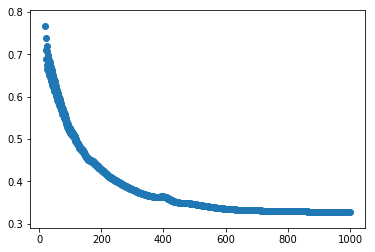

In [126]:
import matplotlib.pyplot as plt
plt.scatter(iter1[20:],cost[20:])
plt.show()

Finally computing the accuracy fo our nn model .As  predicted is 2D Variable ,we first squeeze it to 1D then compare its data part with the target.data.

In [127]:
predicted = nn_model(train_x).type(dtype)
predicted[predicted>=.5]=1
predicted[predicted<.5]=0
predicted = predicted.squeeze()
torch.sum(predicted.data==target.data)/310

0.8193548387096774